# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
import pandas as pd # importar librerías

In [2]:
orders = pd.read_csv("/datasets/instacart_orders.csv", sep=";")
products = pd.read_csv("/datasets/products.csv", sep=";")
aisles = pd.read_csv("/datasets/aisles.csv", sep=";")
departments = pd.read_csv("/datasets/departments.csv", sep=";")
order_products = pd.read_csv("/datasets/order_products.csv", sep=";")# leer conjuntos de datos en los DataFrames

In [3]:
orders.info(show_counts=True)# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
products.info(show_counts=True)# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
aisles.info(show_counts=True)# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
departments.info(show_counts=True)# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
order_products.info(show_counts=True)# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Los datos no fueron cargados correctamente Ludwin, si ves en la información mostrada todos tienen una sola fila y tiene textos cómo `order_id;product_id` lo que indica qque para usar `read_csv` debes indicar el separador con `sep=';'` dentro de la llamada a read_csv. Esto está causando errores con las siguientes celdas y veo que tienes dudas sobre los ejercicios por lo que pondré al tanto al equipo sobre esto para que puedan ayudarte de manera personalizada.
    
Te sugeriría esperar por el contacto de tu CM para que te asignen una tutoría de ser necesario o puedes tomar la iniciativa tú y solicitarla. Saludos!
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Recuerda que para usar `info()` debes incluir `show_counts=True` cómo se menciona en la descripción del proyecto, de lo contrario tendrás casos cómo este donde no se muestre la cantidad de filas por ser el dataset muy grande.
    
Además, no es necesario que importes la librería más de una vez, veo que este problema se repite en varios ejercicios por lo que te pediría corregir esa parte
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (3ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, ahora se muestran los datos para el dataset más grande también
</div>

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.
Con los procesos anteriores podemos importar las librerias solicitadas asi como leer los conjuntos y con ayuda de info verificar la informacion de cada Dataframe. 


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.
Verificación y corrección de tipos de datos
Identificación y eliminación de valores duplicados
Identificación y manejo de valores ausentes


## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
duplicados_orders = orders[orders.duplicated()]
display("Duplicados en orders:")
display(duplicados_orders) # Revisa si hay pedidos duplicados


'Duplicados en orders:'

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común? 
Todas las filas duplicadas tienen en común que order_dow (día de la semana del pedido) es 3 y order_hour_of_day (hora del pedido) es 2.
Existen valores NaN en days_since_prior_order, lo que podría indicar primeros pedidos o datos faltantes.
Los pedidos duplicados pueden estar relacionados con un problema de carga o una duplicación en la fuente de datos.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

# Filtrar pedidos que se hicieron el miércoles a las 2:00 a.m.
orders_wednesday_2am = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]

# Mostrar los primeros registros
display(orders_wednesday_2am.head())

# Contar cuántos pedidos cumplen con la condición
display(f"Número total de pedidos el miércoles a las 2:00 a.m.: {orders_wednesday_2am.shape[0]}")


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0


'Número total de pedidos el miércoles a las 2:00 a.m.: 121'

¿Qué sugiere este resultado?

Son los habitos de compra de los usuarios en la madrugada y es un comportamiento de compra interesante, vemos y nos podemos enfocar en el dia de la seman aque la mayoria de usuarios hicieron el pedido, la hora y cuando fue la ultima vez que cada usuario habia hecho un pedido.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el filtro y la conclusión, aquí te recomendaría que en lugar de print uses `display()` para mostrar datos tabulares cómo los dataframe ya que así se muestran cómo tabla y no cómo texto
</div>

In [10]:
orders_sin_duplicados = orders.drop_duplicates()

print(orders_sin_duplicados)# Elimina los pedidos duplicados


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [11]:
duplicados_after = orders_sin_duplicados[orders_sin_duplicados.duplicated()]
print("Duplicados después de eliminar:")
print(duplicados_after)
# Vuelve a verificar si hay filas duplicadas


Duplicados después de eliminar:
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [12]:
duplicados_order_ids = orders_sin_duplicados[orders_sin_duplicados.duplicated(subset=['order_id'])]# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(duplicados_order_ids)

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos
l proceso de eliminación de duplicados se llevó a cabo con éxito, y los datos ahora están listos para un análisis posterior sin la influencia de registros repetidos.

### `products` data frame

In [13]:
duplicados_totales = orders_sin_duplicados[orders_sin_duplicados.duplicated()]
print(duplicados_totales)
# Verifica si hay filas totalmente duplicadas


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [14]:
duplicados_departments = departments[departments.duplicated(subset=['department_id'])]# Revisa únicamente si hay ID de departamentos duplicados
print(duplicados_departments)

Empty DataFrame
Columns: [department_id, department]
Index: []


In [15]:
products['product_name'] = products['product_name'].str.upper()

productos_sin_nan = products.dropna(subset=['product_name'])

# Verifica si hay productos duplicados
duplicados_productos = productos_sin_nan[productos_sin_nan.duplicated(subset=['product_name'], keep=False)]

# Muestra los productos duplicados
print(duplicados_productos)

       product_id                                     product_name  aisle_id  \
41             42                                  BIOTIN 1000 MCG        47   
185           186       FRESH SCENT DISHWASHER DETERGENT WITH DAWN        74   
515           516                           AMERICAN CHEESE SLICES        21   
1538         1539                                 CAULIFLOWER HEAD        83   
1783         1784              NUTRITION PROTEIN MIX BLUEBERRY NUT       117   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
41              

In [16]:
productos_sin_nan = products[products['product_name'].notna()].copy()


productos_sin_nan.loc['product_name'] = productos_sin_nan['product_name'].str.upper()

# Buscar los productos duplicados
duplicados_productos = productos_sin_nan[productos_sin_nan.duplicated(subset=['product_name'], keep=False)]

# Mostrar los productos duplicados
print(duplicados_productos[['product_id', 'product_name']])

       product_id                                     product_name
41           42.0                                  BIOTIN 1000 MCG
185         186.0       FRESH SCENT DISHWASHER DETERGENT WITH DAWN
515         516.0                           AMERICAN CHEESE SLICES
1538       1539.0                                 CAULIFLOWER HEAD
1783       1784.0              NUTRITION PROTEIN MIX BLUEBERRY NUT
...           ...                                              ...
49689     49690.0                    HIGH PERFORMANCE ENERGY DRINK
49690     49691.0                    ORIGINAL PANCAKE & WAFFLE MIX
49691     49692.0  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692     49693.0                           SPRING WATER BODY WASH
49693     49694.0                          BURRITO- STEAK & CHEESE

[207 rows x 2 columns]


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Se identificaron y eliminaron filas duplicadas en los pedidos, tanto a nivel general como específicamente para los IDs de pedidos. Se verificó si había nombres duplicados de product y se revisaron los nombres de productos no faltantes, igual se mostro los productos duplicados el pasillo de viveres donde se encuentra.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
duplicados_totales = products[products.duplicated()]

# Mostrar las filas completamente duplicadas
print(duplicados_totales)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
duplicados_ids_productos = products[products.duplicated(subset=['product_id'])]

# Mostrar los registros con IDs duplicados de productos
print(duplicados_ids_productos)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos. En ninguno de los dos casos hay filas duplicadas

### `aisles` data frame

In [19]:
duplicados_totales = aisles[aisles.duplicated()]
print(duplicados_totales)# Revisa si hay filas totalmente duplicadas

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [20]:
duplicados_ids_pasillos = aisles[aisles.duplicated(subset=['aisle_id'])]
print(duplicados_ids_pasillos)# Revisa únicamente si hay IDs duplicadas de pasillos

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.
No hay filas duplicadas ni IDS

### `order_products` data frame

In [21]:
duplicados_order_products = order_products[order_products.duplicated()]

# Mostrar los resultados

print(duplicados_order_products)# Revisa si hay filas totalmente duplicadas


Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [22]:
duplicados_en_order_products = order_products[order_products.duplicated(subset=['order_id', 'product_id'])]
print(duplicados_en_order_products)
# Vuelve a verificar si hay cualquier otro duplicado engañoso


Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.
No hay duplicados

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
valores_ausentes_product_name = products[products['product_name'].isna()]
print(valores_ausentes_product_name)# Encuentra los valores ausentes en la columna 'product_name'

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.
He encontrado que el DataFrame products contiene 1,258 filas con valores ausentes en la columna product_name. Estos valores NaN indican que algunos productos no tienen un nombre asignado. Esto podría ser el resultado de un error en el proceso de carga de datos o de productos que no se han registrado correctamente en la base de datos.

In [24]:
# ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

productos_con_nan = products[products['product_name'].isna()]

todos_en_pasillo_100 = (productos_con_nan['aisle_id'] == 100).all()

if todos_en_pasillo_100:
    print("Si, todos los productos ausentes estan relacionados con el pasillo con ID 100.")
else:
    print("No, no todos los productos ausentes estan en el pasillo con ID 100.")


Si, todos los productos ausentes estan relacionados con el pasillo con ID 100.


In [25]:
productos_con_nan = products[products['department_id'].isna()]

department_21= (productos_con_nan['department_id'] == 21).all()

if department_21 :
    print("Si, todos los productos ausentes estan relacionados con el pasillo con ID 21.")
else:
    print("No, no todos los productos ausentes estan en el pasillo con ID 21.")# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?


Si, todos los productos ausentes estan relacionados con el pasillo con ID 21.


Describe brevemente cuáles son tus hallazgos.

Al revisar los productos con nombres ausentes, encontré que todos los productos sin nombre están relacionados con el departamento con ID 21. Esto indica que la falta de nombres en estos productos está vinculada a ese departamento específico, lo que podría sugerir un problema o patrón en los datos de ese departamento.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
# Filtrar el pasillo con ID 100
pasillo_100 = aisles[aisles['aisle_id'] == 100]

# Filtrar el departamento con ID 21
departamento_21 = departments[departments['department_id'] == 21]

# Mostrar los resultados
print("Datos del pasillo con ID 100:")
print(pasillo_100)

print("\nDatos del departamento con ID 21:")
print(departamento_21)


Datos del pasillo con ID 100:
    aisle_id    aisle
99       100  missing

Datos del departamento con ID 21:
    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.



In [27]:
products['product_name'] = products['product_name'].fillna('Unknown')# Completa los nombres de productos ausentes con 'Unknown'
# Verificar que los valores ausentes han sido reemplazados
print(products['product_name'].isna().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Al identificar los productos con nombres ausentes en la columna product_name, decidí reemplazar esos valores NaN con la palabra 'Unknown' para evitar que los productos sin nombre afectaran el análisis. 

### `orders` data frame

In [28]:
valores_ausentes = orders.isna()
print(valores_ausentes)# Encuentra los valores ausentes

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0          False    False         False      False              False   
1          False    False         False      False              False   
2          False    False         False      False              False   
3          False    False         False      False              False   
4          False    False         False      False              False   
...          ...      ...           ...        ...                ...   
478962     False    False         False      False              False   
478963     False    False         False      False              False   
478964     False    False         False      False              False   
478965     False    False         False      False              False   
478966     False    False         False      False              False   

        days_since_prior_order  
0                        False  
1                        False  
2                       

In [29]:
valores_ausentes_days_since_prior = orders[orders['days_since_prior_order'].isna()]

# Verificar si estos registros corresponden a los primeros pedidos de los clientes
primer_pedido_cliente = valores_ausentes_days_since_prior['order_number'] == 1

# Comprobar si hay valores ausentes que no sean el primer pedido
valores_ausentes_no_primer_pedido = valores_ausentes_days_since_prior[~primer_pedido_cliente]# ¿Hay algún valor ausente que no sea el primer pedido del cliente?


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Al investigar los valores ausentes en la columna days_since_prior_order, descubrí que todos los valores ausentes están asociados con el primer pedido de cada cliente, lo cual es esperado, ya que no hay un pedido anterior para esos registros.

### `order_products` data frame

In [30]:
valores_ausentes_order_products = order_products.isna()
print(valores_ausentes_order_products)
# Encuentra los valores ausentes

         order_id  product_id  add_to_cart_order  reordered
0           False       False              False      False
1           False       False              False      False
2           False       False              False      False
3           False       False              False      False
4           False       False              False      False
...           ...         ...                ...        ...
4545002     False       False              False      False
4545003     False       False              False      False
4545004     False       False              False      False
4545005     False       False              False      False
4545006     False       False              False      False

[4545007 rows x 4 columns]


In [31]:
minimo_add_to_cart_order = order_products['add_to_cart_order'].min()
maximo_add_to_cart_order = order_products['add_to_cart_order'].max()# ¿Cuáles son los valores mínimos y máximos en esta columna?

print(f"Valor mínimo de 'add_to_cart_order': {minimo_add_to_cart_order}")
print(f"Valor máximo de 'add_to_cart_order': {maximo_add_to_cart_order}")

Valor mínimo de 'add_to_cart_order': 1.0
Valor máximo de 'add_to_cart_order': 64.0


Describe brevemente cuáles son tus hallazgos.
Estos datos pueden ayudarte a entender el comportamiento de compra de los usuarios y a identificar patrones o anomalías en el proceso de selección de productos.

In [32]:
pedidos_ausentes_add_to_cart_order = order_products[order_products['add_to_cart_order'].isna()]

ids_pedidos_ausentes = pedidos_ausentes_add_to_cart_order['order_id'].unique()# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

print(ids_pedidos_ausentes)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [33]:

pedidos_ausentes = order_products[order_products['add_to_cart_order'].isna()]

ids_pedidos_ausentes = pedidos_ausentes['order_id'].unique()

productos_ausentes = order_products[order_products['order_id'].isin(ids_pedidos_ausentes)]

conteo_productos_pedidos_ausentes = productos_ausentes.groupby('order_id')['product_id'].count()

pedidos_mayores_a_64 = conteo_productos_pedidos_ausentes[conteo_productos_pedidos_ausentes > 64]

print(f"Pedidos con más de 64 productos y valores ausentes en 'add_to_cart_order':\n{pedidos_mayores_a_64}")# Verificar si hay algún pedido con más de 64 productos


Pedidos con más de 64 productos y valores ausentes en 'add_to_cart_order':
order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Name: product_id, Length: 70, dtype: int64


Describe brevemente cuáles son tus hallazgos.
El resultado nos indica que no hay pedidos con más de 64 productos entre aquellos que tienen valores ausentes en la columna add_to_cart_order.

In [34]:
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(0).astype(int)

# Verificar el cambio
print(order_products['add_to_cart_order'].dtype)


int64


Describe brevemente tus hallazgos y lo que hiciste con ellos. add to cart ha sido convertida a numeros enteros y al igual que no hubo pedidos con mas de 64 productos, nos ayuda a tomar en cuanto cuantos productos son los que realmente adquieren los clientes.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
El Paso 2 ha sido de gran utilidad ya que hemos podido darnos cuenta de cuales son nuestros productos duplicados en que horarios o dias fueron consumidos con mayor frecuencia al igual que investigamos nuestros valores ausentes en otras columnas  y esto es muy importante ya que nos da a entender que podria ser el resultado de un error en el proceso de carga de datos o de productos que no se han registrado correctamente en la base de datos.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
# Verifica que los valores en las columnas 'order_hour_of_day' y 'order_dow' en la tabla orders sean razonables (es decir, 'order_hour_of_day' oscile entre 0 y 23 y 'order_dow' oscile entre 0 y 6).
horas_invalidas = orders[(orders['order_hour_of_day'] < 0) | (orders['order_hour_of_day'] > 23)]
print("Valores fuera de rango en 'order_hour_of_day':")
print(horas_invalidas)


dias_invalidos = orders[(orders['order_dow'] < 0) | (orders['order_dow'] > 6)]
print("Valores fuera de rango en 'order_dow':")
print(dias_invalidos)

Valores fuera de rango en 'order_hour_of_day':
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
Valores fuera de rango en 'order_dow':
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Escribe aquí tus conclusiones El resultado que ves indica que no hay valores fuera de rango en las columnas order_hour_of_day y order_dow. Es decir, todos los valores en esas columnas están dentro de los rangos esperados.

Todos los datos en esas columnas parecen estar correctamente formateados y no requieren correcciones en cuanto a esos rangos.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

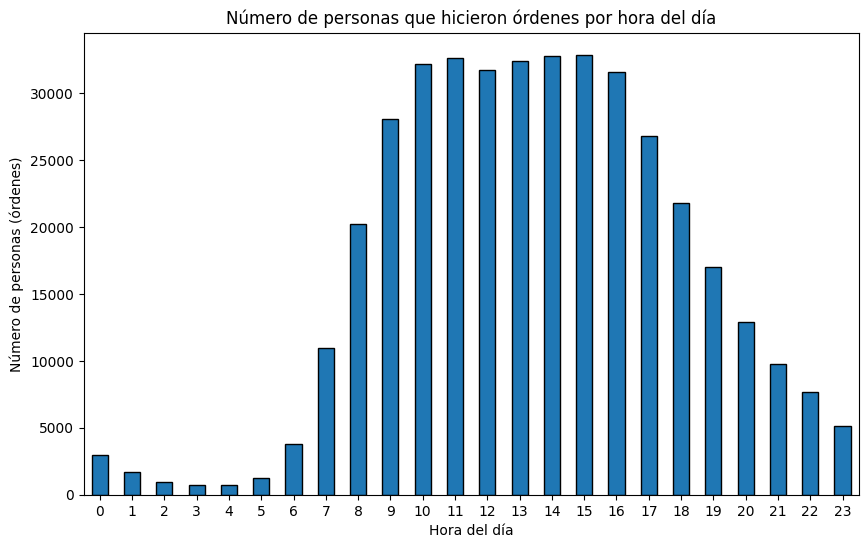

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Contamos el número de pedidos por cada hora del día, considerando solo el 'user_id' para evitar duplicados
ordenes_por_hora = orders.groupby('order_hour_of_day')['user_id'].nunique()

# Graficamos la distribución de los pedidos por hora del día
plt.figure(figsize=(10, 6))
ordenes_por_hora.plot(kind='bar', edgecolor='black')
plt.title('Número de personas que hicieron órdenes por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de personas (órdenes)')
plt.xticks(rotation=0)
plt.show()

Escribe aquí tus conclusiones el numero de personas aumenta en ciertas horas del dia apartir de las 8 y a las 17 comienza a bajar el numero de ordenes, por lo tanto seria bueno saber en que momento del dia es mejor incrementar la produccion para siempre cumplir con los pedidos.

### [A3] ¿Qué día de la semana compran víveres las personas?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


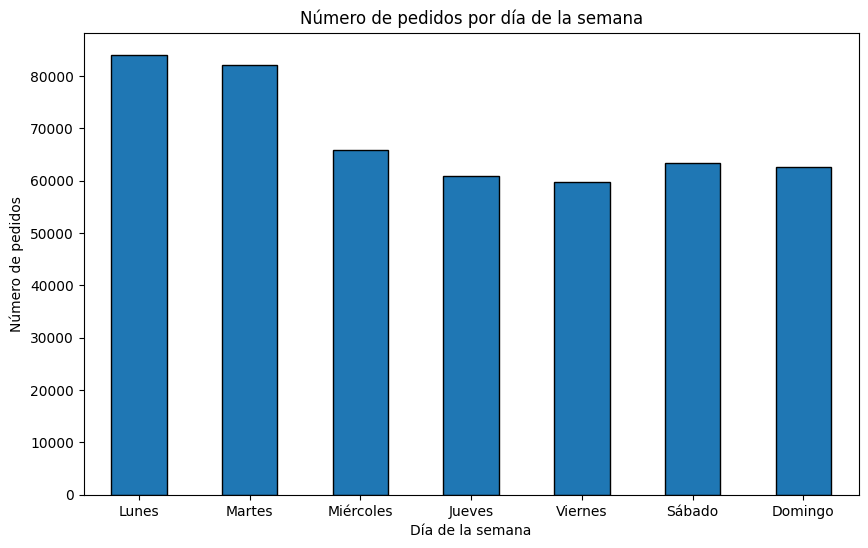

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_id, dtype: int64


In [37]:


orders = pd.read_csv("/datasets/instacart_orders.csv", sep=";")


orders.info()


pedidos_por_dia = orders.groupby('order_dow')['order_id'].nunique()


plt.figure(figsize=(10, 6))
pedidos_por_dia.plot(kind='bar', edgecolor='black')
plt.title('Número de pedidos por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de pedidos')
plt.xticks(ticks=range(7), labels=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], rotation=0)
plt.show()


print(pedidos_por_dia)

Escribe aquí tus conclusiones los Lunes son los dias con mas pedidos de toda la semana,

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

count    478967.000000
mean         10.433769
std           9.292125
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64
Valor mínimo de días hasta el siguiente pedido: 0.0
Valor máximo de días hasta el siguiente pedido: 30.0


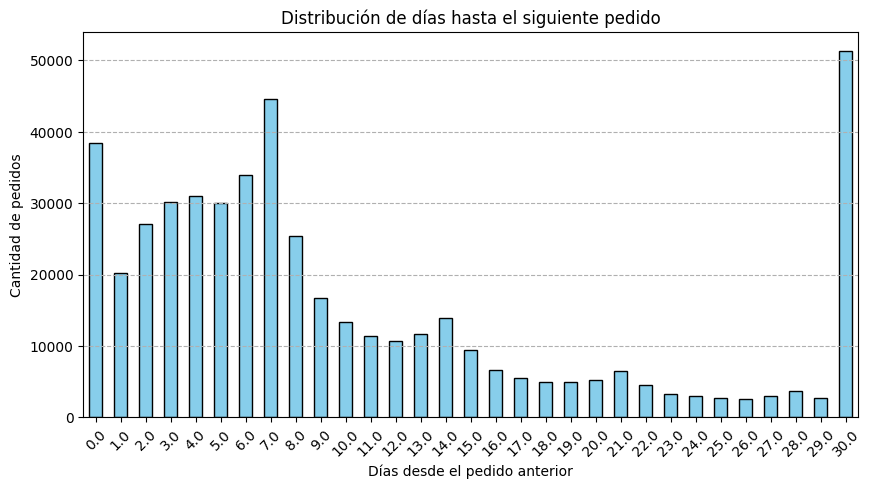

In [38]:
orders['days_since_prior_order'].fillna(0, inplace=True)


descripcion_tiempos = orders['days_since_prior_order'].describe()


print(descripcion_tiempos)


min_value = orders['days_since_prior_order'].min()
max_value = orders['days_since_prior_order'].max()

print(f"Valor mínimo de días hasta el siguiente pedido: {min_value}")
print(f"Valor máximo de días hasta el siguiente pedido: {max_value}")


plt.figure(figsize=(10,5))
orders['days_since_prior_order'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de días hasta el siguiente pedido')
plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Cantidad de pedidos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=1.0)
plt.show()


Escribe aquí tus conclusiones La grafica nos muestra un sube y baja constante entre la cantidad de pedidos y los dias desde el pedido anterior, principalmente a paratir de el dia 7 vemos un cremento abrupto pero de igual manera la cantidad de pedidos disminuyo al dia 8 considerablemente. hay que revisar cuales son los factores o las causas porque las personas dejaron de adquirieron tantos pedidos a partir del dia 8 o si solo fue que tenian suficientes pedidos desde los dias anteriores.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

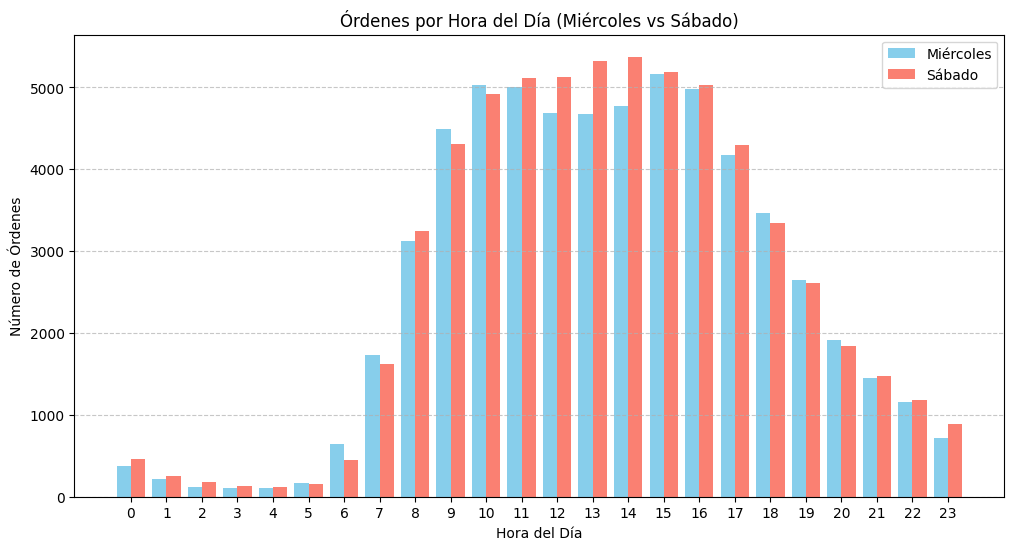

In [39]:
import numpy as np

ordenes_miercoles = orders[orders['order_dow'] == 3]
ordenes_sabado = orders[orders['order_dow'] == 6]

ordenes_miercoles_por_hora = ordenes_miercoles.groupby('order_hour_of_day')['order_id'].count()
ordenes_sabado_por_hora = ordenes_sabado.groupby('order_hour_of_day')['order_id'].count()

horas = np.arange(24)  

plt.figure(figsize=(12, 6))

plt.bar(horas - 0.2, ordenes_miercoles_por_hora, width=0.4, color='skyblue', label='Miércoles')
plt.bar(horas + 0.2, ordenes_sabado_por_hora, width=0.4, color='salmon', label='Sábado')

plt.title('Órdenes por Hora del Día (Miércoles vs Sábado)')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Órdenes')
plt.xticks(horas)  
plt.legend()  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Escribe aquí tus conclusiones, Con esta grafica nos podemos dar cuenta claramente de las diferencias entre el sabado y el miercoles, por momentos el dia sabado tiene una mayr cantidad de pedidos principalmente entre las 11 AM a las 6 PM aunque en los demas horarios no hay tanta diferencia se demuetra que el mejor dia entre estos dos donde se reciben pedidos es el dia sabado.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

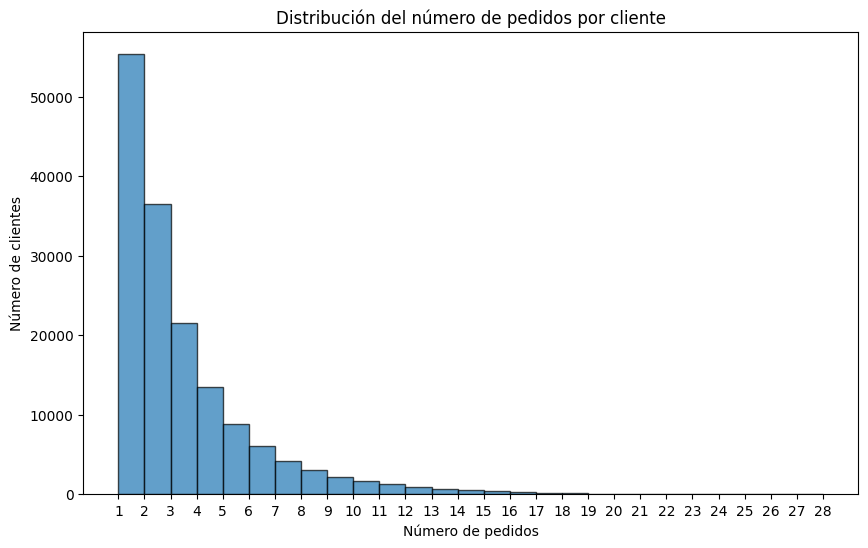

In [40]:

pedidos_por_cliente = orders.groupby('user_id')['order_id'].nunique()

# Grafica
plt.figure(figsize=(10, 6))
pedidos_por_cliente.plot(kind='hist', bins=range(1, pedidos_por_cliente.max() + 1), edgecolor='black', alpha=0.7)
plt.title('Distribución del número de pedidos por cliente')
plt.xlabel('Número de pedidos')
plt.ylabel('Número de clientes')
plt.xticks(range(1, pedidos_por_cliente.max() + 1))
plt.show()


Escribe aquí tus conclusiones, Esta grafica nos demuestra que es mas recurrente que los clientes solo hagan un pedido a que continuen como clientes frecuentes.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

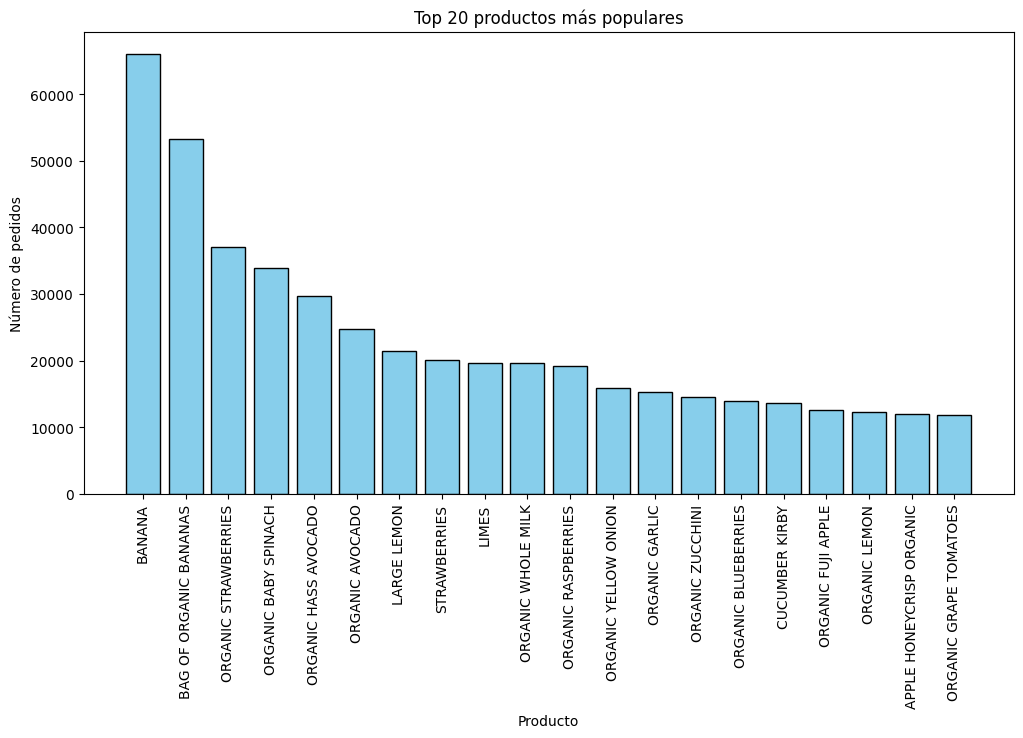

In [41]:

productos_populares = order_products.groupby('product_id')['order_id'].nunique()

productos_populares = productos_populares.sort_values(ascending=False)


top_20_productos = productos_populares.head(20)

top_20_productos = top_20_productos.reset_index()


top_20_productos = top_20_productos.merge(products[['product_id', 'product_name']], on='product_id', how='left')


plt.figure(figsize=(12, 6))
plt.bar(top_20_productos['product_name'], top_20_productos['order_id'], color='skyblue', edgecolor='black')

plt.xlabel('Producto')
plt.ylabel('Número de pedidos')
plt.title('Top 20 productos más populares')
plt.xticks(rotation=90)
plt.show()


Escribe aquí tus conclusiones En esta grafica descendente podemos ver los productos mas importantes y del lado izquierdo el numero de ID aunque no es super preciso podemos apreciar entre que rango de pedidos esta para encontrarlos con mayor facilidad.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

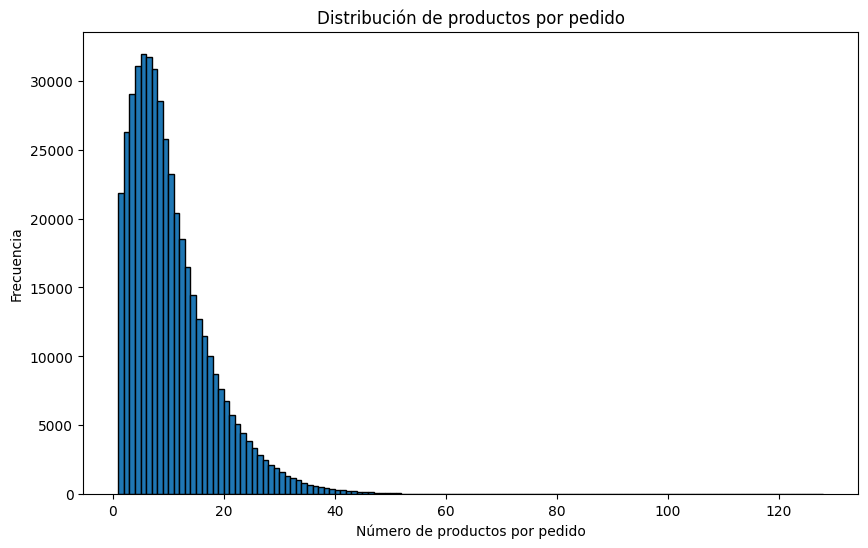

In [42]:

productos_por_pedido = order_products.groupby('order_id')['product_id'].count()


estadisticas = productos_por_pedido.describe()




plt.figure(figsize=(10, 6))
plt.hist(productos_por_pedido, bins=range(1, productos_por_pedido.max() + 2), edgecolor='black')
plt.title('Distribución de productos por pedido')
plt.xlabel('Número de productos por pedido')
plt.ylabel('Frecuencia')
plt.show()





Escribe aquí tus conclusiones Podemos apreciar un incremento en el numero de pedidos entre los 10 como punto maximo y comenzando a descender en el 20 no es tan comun que en un solo pedido el cliente compre mas de 20 productos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

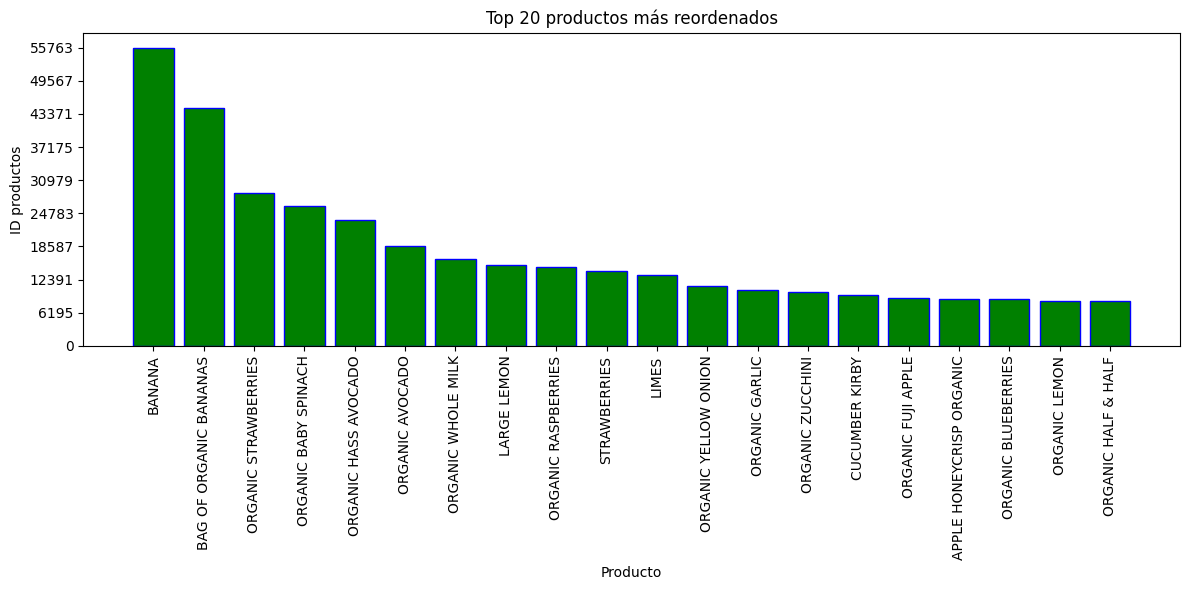

In [43]:
import numpy as np

productos_reordenados = order_products[order_products['reordered'] == 1]

productos_reordenados_count = productos_reordenados.groupby('product_id')['order_id'].nunique()

top_20_reordenados = productos_reordenados_count.sort_values(ascending=False).head(20).reset_index()

top_20_reordenados = top_20_reordenados.merge(products[['product_id', 'product_name']], on='product_id', how='left')

plt.figure(figsize=(12, 6))
plt.bar(top_20_reordenados['product_name'], top_20_reordenados['order_id'], color='green', edgecolor='blue')


plt.xlabel('Producto')
plt.ylabel('ID productos')  
plt.title('Top 20 productos más reordenados')


plt.xticks(rotation=90)

plt.ticklabel_format(style='plain', axis='y')


plt.yticks(np.linspace(0, top_20_reordenados['order_id'].max(), num=10).astype(int)
)


plt.tight_layout()


plt.show()



Escribe aquí tus conclusiones Podemos ver que los productos mas reordenados son Banana, bolsas, fresas, esto nos da una gran idea de en que productos nosotros nos podriamos enfocar y al mismo tiempo una estartegia para que los demas productos incrementen sus ventas.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

También hace falta las conclusiones para estos ejercicios, y para este último en particular también deberías mostrar una gráfica de barras
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (4ta Iteracion)</b> <a class=“tocSkip”></a>

Sigue sin haberse importado la librería numpy, debes agregar `import numpy as np` al inicio del notebook
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (5ta Iteracion)</b> <a class=“tocSkip”></a>

Bien, ahora si se pudo ejecutar sin problema
</div>

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [44]:

total_pedidos = order_products.groupby('product_id')['order_id'].nunique()

productos_reordenados = order_products[order_products['reordered'] == 1]
productos_reordenados_count = productos_reordenados.groupby('product_id')['order_id'].nunique()

tasa_repeticion_producto = (productos_reordenados_count / total_pedidos).fillna(0)

tasa_repeticion_producto_df = tasa_repeticion_producto.reset_index()
tasa_repeticion_producto_df = tasa_repeticion_producto_df.merge(products[['product_id', 'product_name']], on='product_id', how='left')

tasa_repeticion_producto_df = tasa_repeticion_producto_df.rename(columns={'order_id': 'tasa_repeticion'})

display(tasa_repeticion_producto_df[['product_id', 'product_name', 'tasa_repeticion']])





,product_id,product_name,tasa_repeticion
0,1,CHOCOLATE SANDWICH COOKIES,0.564286
1,2,ALL-SEASONS SALT,0.000000
2,3,ROBUST GOLDEN UNSWEETENED OOLONG TEA,0.738095
3,4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,0.510204
4,7,PURE COCONUT WATER WITH ORANGE,0.500000
...,...,...,...
45568,49690,HIGH PERFORMANCE ENERGY DRINK,0.800000
45569,49691,ORIGINAL PANCAKE & WAFFLE MIX,0.430556
45570,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,0.416667
45571,49693,SPRING WATER BODY WASH,0.440000


Escribe aquí tus conclusiones Con esta tabla vemos que de los 5 principales productos su tasa de repeticion varia mucho repticion, es una vision general de que tanto los consumidores estan adquiriendo y con que frecuencia ese producto en especifico.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

No hay conclusiones y se está usando una variable que no existe en el notebook
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (4ta Iteracion)</b> <a class=“tocSkip”></a>

Deberías tener una proporción con valores de 0 a 1, tipo 0.33 o así cómo lo tienes en el ejercicio de abajo
</div>

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [45]:

order_products_with_user = order_products.merge(orders[['order_id', 'user_id']], on='order_id', how='left')


productos_reordenados = order_products_with_user[order_products_with_user['reordered'] == 1]

productos_por_usuario = order_products_with_user.groupby('user_id')['product_id'].nunique()


productos_reordenados_por_usuario = productos_reordenados.groupby('user_id')['product_id'].nunique()


tasa_repeticion_usuario = (productos_reordenados_por_usuario / productos_por_usuario).fillna(0)


tasa_repeticion_usuario_df = tasa_repeticion_usuario.reset_index()
tasa_repeticion_usuario_df.columns = ['user_id', 'tasa_repeticion']


display(tasa_repeticion_usuario_df)




,user_id,tasa_repeticion
0,2,0.040000
1,4,0.000000
2,5,0.666667
3,6,0.000000
4,7,0.923077
...,...,...
149621,206203,0.222222
149622,206206,0.705882
149623,206207,0.848485
149624,206208,0.612500


Escribe aquí tus conclusiones En este caso la tasa de repeticion de los productos varia mucho mas para cada ciente esto quiere decir que no los consumen de una manera tan reptitiva y por ende es una oportunidad para aplicar ciertas estrategias he identificar necesidades de clientes.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

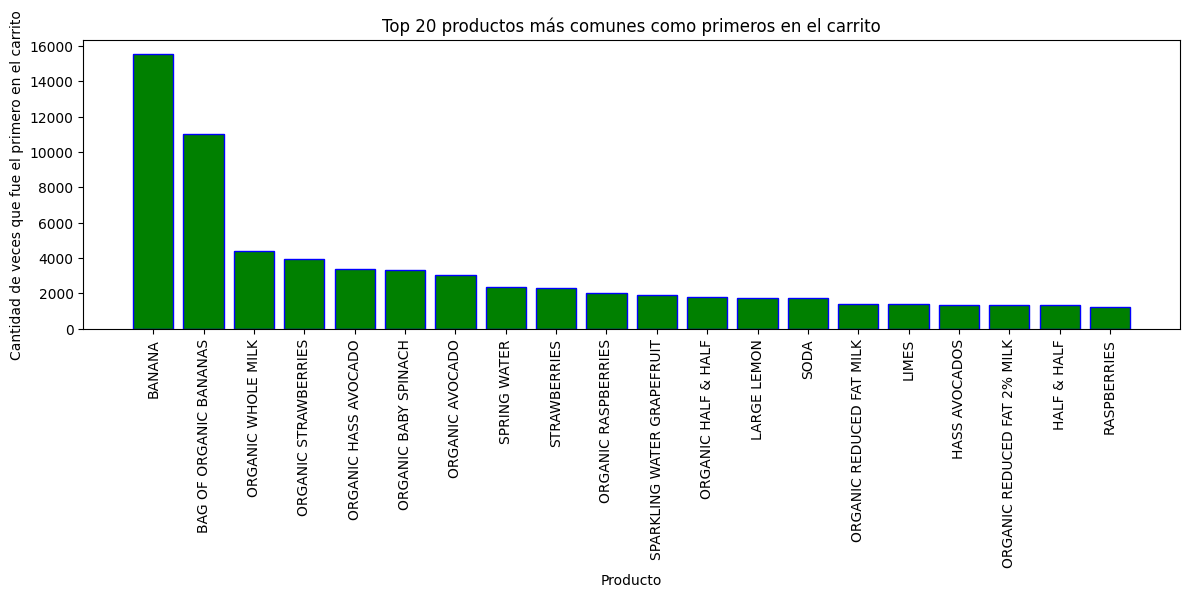

In [46]:
primeros_en_carrito = order_products[order_products['add_to_cart_order'] == 1]

productos_primeros_count = primeros_en_carrito.groupby('product_id')['order_id'].count()

productos_primeros_count = productos_primeros_count.sort_values(ascending=False)

top_20_primeros = productos_primeros_count.head(20).reset_index()

top_20_primeros = top_20_primeros.merge(products[['product_id', 'product_name']], on='product_id', how='left')

plt.figure(figsize=(12, 6))
plt.bar(top_20_primeros['product_name'], top_20_primeros['order_id'], color='green', edgecolor='blue')

plt.xlabel('Producto')
plt.ylabel('Cantidad de veces que fue el primero en el carrito')
plt.title('Top 20 productos más comunes como primeros en el carrito')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()




Escribe aquí tus conclusiones Una manera muy practica de ver cuales son los principales productos que las personas ponen en sus carritos y su compra de estos mismos de finitivamente hay productos mas populares que otros  y aqui se puede ver a simple vista cuales son y podemos identificar algunas causas de porque los consumidores lo hacen de manera repetida.

### Conclusion general del proyecto:

Como sabemos desde el inicio del proyecto de Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash. Con todo el conjunto de datos que hemos analizando, depurado y sera de vital importancia para la empresa en el futuro, desde saber cuales son sus productos mas populares, los que las personbas seleccionan primero asi como sus clientes mas fieles, hasta los dias y horas en que las personas deciden poner mas pedidos en la plataforma. con todo esto Instacart puede aplicar nuevas estrategias de marketing asi como segmentar mejor su mercado y saber en que areas y herramientas es mejor invertir para que Instacart siga creciendo.

De los principales hallazagos que podemos destacar son: son uno de los productos que las personas mas consumen, son lo primero que poenne en su carrito y se vuelven a pedir con mayor frecuencia, de igual manera las personas no consumen en una misma orden una gran cantidad de productos el limite puede ser 20 y a partir de ahi se reducen los productos que compran. Es de suma importancia saber que las horas donde las personas hacen mas pedidos son entre las 11 AM  y 5 PM al igual que el lunes y ma